## 1.Loading the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [98]:
from statsmodels.tsa.stattools import kpss

import statsmodels.api as sm
from pylab import rcParams

import itertools

from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [117]:
from sklearn.metrics import mean_squared_error

## 2.Loading the Dataset

In [6]:
df_beer=pd.read_csv('C:/Users/Sushree Jena/Desktop/imarticus/machine learning/Kaggle/beer_production/beer.csv',parse_dates=['Month'])

In [8]:
df_beer.head()

,Month,Monthly beer production
0,1956-01-01,93.2
1,1956-02-01,96.0
2,1956-03-01,95.2
3,1956-04-01,77.1
4,1956-05-01,70.9


## 3.Exploratory Data Analysis

In [7]:
df_beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    476 non-null    datetime64[ns]
 1   Monthly beer production  476 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.6 KB


In [10]:
df_beer.Month.min(),df_beer.Month.max()

(Timestamp('1956-01-01 00:00:00'), Timestamp('1995-08-01 00:00:00'))

In [11]:
df_beer.columns=['Month','Production']

In [12]:
df_beer=df_beer.set_index('Month')

In [13]:
df_beer.head()

,Production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


In [14]:
#plotting the timeseries

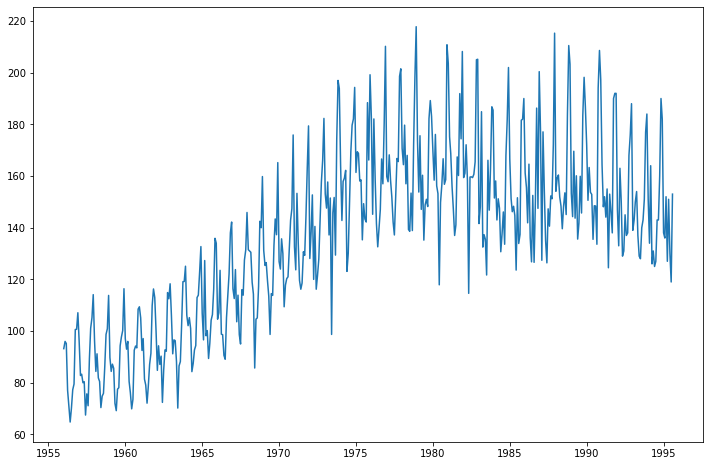

In [19]:
plt.figure(figsize=(12,8))
plt.plot(df_beer['Production'])
plt.show()

In [20]:
#test for stationarity

In [23]:
#KPSS test
#H0=stationary

In [27]:
from warnings import filterwarnings
filterwarnings('ignore')

In [28]:
kpss_res=kpss(df_beer,nlags='auto')

In [29]:
kpss_res[0]

2.9654643479835916

In [30]:
kpss_res[1]

0.01

We reject the null hypothesis.The data is not stationary.

In [31]:
#decomposing the timeseries

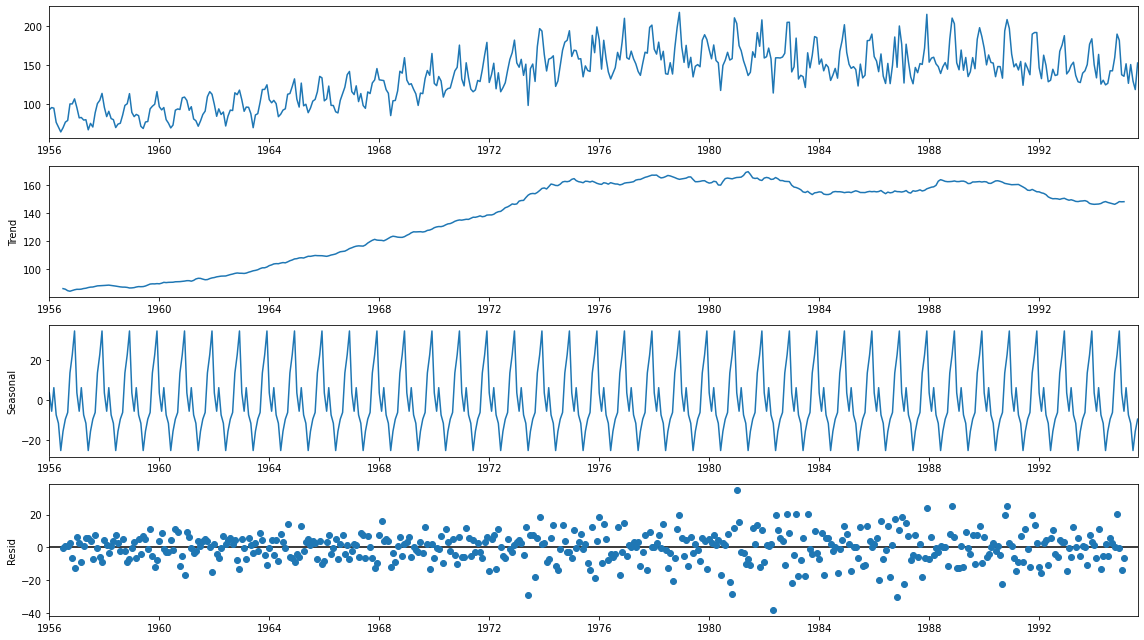

In [35]:
rcParams['figure.figsize']=16,9
decomposition=sm.tsa.seasonal_decompose(df_beer,model='additive')
decomposition.plot()
plt.show()

## 4.ARIMA Model

In [185]:
p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in pdq]

In [186]:
for i in range(len(pdq)):
    print('SARIMAX {} x {}'.format(pdq[i],seasonal_pdq[i]))

SARIMAX (0, 0, 0) x (0, 0, 0, 12)
SARIMAX (0, 0, 1) x (0, 0, 1, 12)
SARIMAX (0, 1, 0) x (0, 1, 0, 12)
SARIMAX (0, 1, 1) x (0, 1, 1, 12)
SARIMAX (1, 0, 0) x (1, 0, 0, 12)
SARIMAX (1, 0, 1) x (1, 0, 1, 12)
SARIMAX (1, 1, 0) x (1, 1, 0, 12)
SARIMAX (1, 1, 1) x (1, 1, 1, 12)


In [187]:
#model building(try models)

In [188]:
from warnings import filterwarnings
filterwarnings('ignore')

In [189]:
aic_scores={}
i=1

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model=sm.tsa.statespace.SARIMAX(df_beer,
                                     order=param,
                                     seasonal_order=param_seasonal,
                                     enforce_stationarity=False,
                                     enforce_invertibility=False)
            result=model.fit()
            print('{}: ARIMA {} x {}12.AIC: {}'.format(i,param,param_seasonal,result.aic))
            aic_scores[i]=result.aic
            i+=1
        except:
            continue

1: ARIMA (0, 0, 0) x (0, 0, 0, 12)12.AIC: 6048.483263315012
2: ARIMA (0, 0, 0) x (0, 0, 1, 12)12.AIC: 5353.3244737603145
3: ARIMA (0, 0, 0) x (0, 1, 0, 12)12.AIC: 3656.9402892958337
4: ARIMA (0, 0, 0) x (0, 1, 1, 12)12.AIC: 3533.402954582275
5: ARIMA (0, 0, 0) x (1, 0, 0, 12)12.AIC: 3663.927823726336
6: ARIMA (0, 0, 0) x (1, 0, 1, 12)12.AIC: 3613.336411590879
7: ARIMA (0, 0, 0) x (1, 1, 0, 12)12.AIC: 3545.1636287409438
8: ARIMA (0, 0, 0) x (1, 1, 1, 12)12.AIC: 3535.3960111654633
9: ARIMA (0, 0, 1) x (0, 0, 0, 12)12.AIC: 5461.584624684903
10: ARIMA (0, 0, 1) x (0, 0, 1, 12)12.AIC: 4916.811619563332
11: ARIMA (0, 0, 1) x (0, 1, 0, 12)12.AIC: 3648.080979151877
12: ARIMA (0, 0, 1) x (0, 1, 1, 12)12.AIC: 3528.3229566211703
13: ARIMA (0, 0, 1) x (1, 0, 0, 12)12.AIC: 3662.02643144154
14: ARIMA (0, 0, 1) x (1, 0, 1, 12)12.AIC: 3608.863185136146
15: ARIMA (0, 0, 1) x (1, 1, 0, 12)12.AIC: 3547.067825819043
16: ARIMA (0, 0, 1) x (1, 1, 1, 12)12.AIC: 3530.312983788334
17: ARIMA (0, 1, 0) x (0, 0, 

In [190]:
#Getting the key for the lowest AIC

In [191]:
min(aic_scores.values())

3370.1283803810684

In [192]:
min(aic_scores,key=aic_scores.get)

60

In [49]:
#Final Model

We will build the model using param=(1,1,1) and param_seasonal=(0,1,1,12)

In [193]:
final_model=sm.tsa.statespace.SARIMAX(df_beer,
                                     order=(1,1,1),
                                     seasonal_order=(0,1,1,12),
                                     enforce_stationarity=False,
                                     enforce_invertibility=False)
final_result=final_model.fit()

In [194]:
#predicting the result with test set

In [195]:
pred=final_result.get_prediction(start=pd.to_datetime('1994-08-01'),dynamic=False)

In [196]:
pred.predicted_mean

1994-08-01    136.009121
1994-09-01    132.336607
1994-10-01    163.144208
1994-11-01    177.095259
1994-12-01    184.100370
1995-01-01    149.056934
1995-02-01    137.428043
1995-03-01    151.538945
1995-04-01    137.644327
1995-05-01    133.256775
1995-06-01    118.834804
1995-07-01    132.127850
1995-08-01    138.868703
Freq: MS, Name: predicted_mean, dtype: float64

            lower Production  upper Production
1994-08-01        116.146541        155.871700
1994-09-01        112.474027        152.199186
1994-10-01        143.281629        183.006788
1994-11-01        157.232679        196.957838
1994-12-01        164.237791        203.962950
1995-01-01        129.194354        168.919513
1995-02-01        117.565464        157.290622
1995-03-01        131.676366        171.401524
1995-04-01        117.781749        157.506906
1995-05-01        113.394197        153.119354
1995-06-01         98.972226        138.697383
1995-07-01        112.265272        151.990429
1995-08-01        119.006125        158.731282


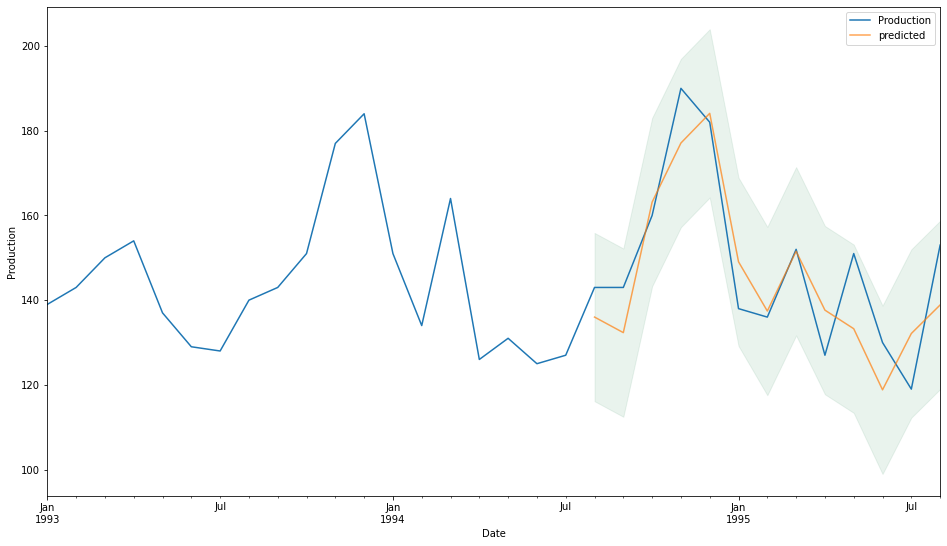

In [197]:
pred_ci=pred.conf_int()
print(pred_ci)

ax=df_beer['1993-01-01':].plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='predicted',alpha=0.7,figsize=(16,9))

ax.fill_between(pred_ci.index,
               pred_ci['lower Production'],
               pred_ci['upper Production'],alpha=0.1,color='seagreen')

ax.set_xlabel('Date')
ax.set_ylabel('Production')

plt.legend()
plt.show()

In [198]:
#forecasting with future time frame

In [199]:
future_pred=final_result.get_prediction(start=pd.to_datetime('1995-09-01'),end=pd.to_datetime('1996-09-01'),dynamic=False)

In [200]:
future_pred.predicted_mean

1995-09-01    133.636658
1995-10-01    164.497897
1995-11-01    178.979508
1995-12-01    184.942683
1996-01-01    146.182505
1996-02-01    136.326790
1996-03-01    152.269569
1996-04-01    136.506879
1996-05-01    136.244934
1996-06-01    123.221736
1996-07-01    129.993751
1996-08-01    139.425165
1996-09-01    134.760092
Freq: MS, Name: predicted_mean, dtype: float64

            lower Production  upper Production
1995-09-01        113.774079        153.499236
1995-10-01        144.604370        184.391423
1995-11-01        158.920829        199.038187
1995-12-01        164.791971        205.093394
1996-01-01        125.929117        166.435894
1996-02-01        115.973218        156.680361
1996-03-01        131.815962        172.723176
1996-04-01        115.953783        157.059975
1996-05-01        115.592818        156.897051
1996-06-01        102.471073        143.972399
1996-07-01        109.145008        150.842494
1996-08-01        118.478800        160.371530
1996-09-01        113.154413        156.365771


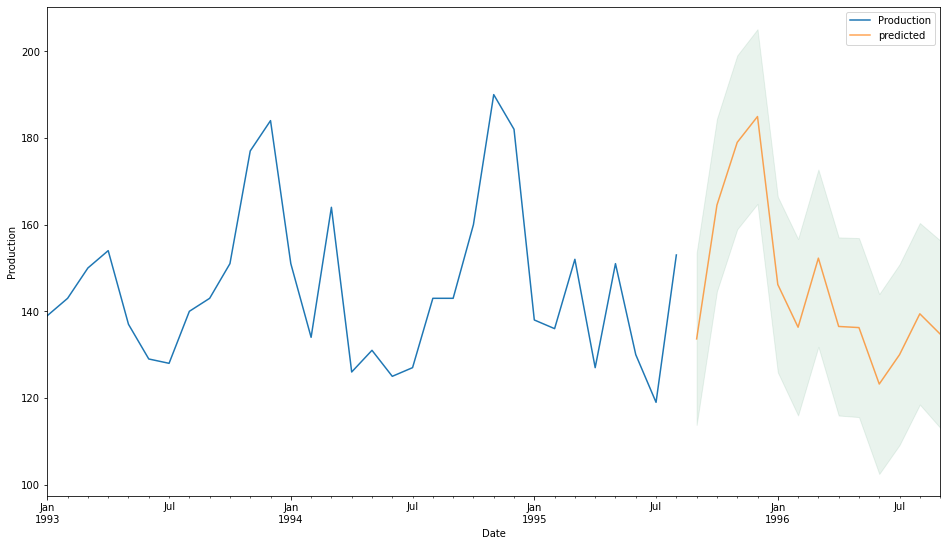

In [201]:
future_pred_ci=future_pred.conf_int()
print(future_pred_ci)

ax=df_beer['1993-01-01':].plot(label='observed')
future_pred.predicted_mean.plot(ax=ax,label='predicted',alpha=0.7,figsize=(16,9))

ax.fill_between(future_pred_ci.index,
               future_pred_ci['lower Production'],
               future_pred_ci['upper Production'],alpha=0.1,color='seagreen')

ax.set_xlabel('Date')
ax.set_ylabel('Production')

plt.legend()
plt.show()

In [202]:
#calculating mse and rmse

In [203]:
y_actual=df_beer['1994-08-01':].values.reshape(1,-1)
y_actual

array([[143., 143., 160., 190., 182., 138., 136., 152., 127., 151., 130.,
        119., 153.]])

In [204]:
y_pred=pred.predicted_mean.values
y_pred

array([136.00912079, 132.33660685, 163.14420825, 177.09525865,
       184.10037041, 149.05693378, 137.42804328, 151.53894514,
       137.64432747, 133.25677527, 118.83480443, 132.12785048,
       138.86870312])

In [205]:
mse=((y_actual-y_pred)**2).mean()
mse

107.13363790690212

In [206]:
rmse=np.sqrt(mse)
rmse

10.35053804915001

In [207]:
#Holt winters model

In [208]:
train=df_beer.iloc[:-20]
test=df_beer.iloc[-20:]

In [209]:
train.shape,test.shape

((456, 1), (20, 1))

In [210]:
seasonal_periods=12

In [211]:
alpha=1/(2*seasonal_periods)

In [212]:
model=ExponentialSmoothing(endog=train,seasonal_periods=12,trend='mul',seasonal='add')
fitted=model.fit(optimized=True,use_brute=True,smoothing_level=alpha)

In [213]:
print(fitted.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:               Production   No. Observations:                  456
Model:             ExponentialSmoothing   SSE                          46616.298
Optimized:                         True   AIC                           2142.009
Trend:                   Multiplicative   BIC                           2207.969
Seasonal:                      Additive   AICC                          2143.574
Seasonal Periods:                    12   Date:                 Tue, 08 Nov 2022
Box-Cox:                          False   Time:                         13:53:15
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0416667                alpha                False
smoothing_trend          

In [214]:
#predicting with test set

In [215]:
test_pred=fitted.forecast(steps=20)
test_pred

1994-01-01    151.232533
1994-02-01    140.852172
1994-03-01    153.658071
1994-04-01    143.503924
1994-05-01    136.693377
1994-06-01    123.740891
1994-07-01    135.333731
1994-08-01    137.999162
1994-09-01    136.309553
1994-10-01    165.039938
1994-11-01    176.249103
1994-12-01    186.402489
1995-01-01    148.550797
1995-02-01    138.172791
1995-03-01    150.981042
1995-04-01    140.829245
1995-05-01    134.021046
1995-06-01    121.070906
1995-07-01    132.666090
1995-08-01    135.333863
Freq: MS, dtype: float64

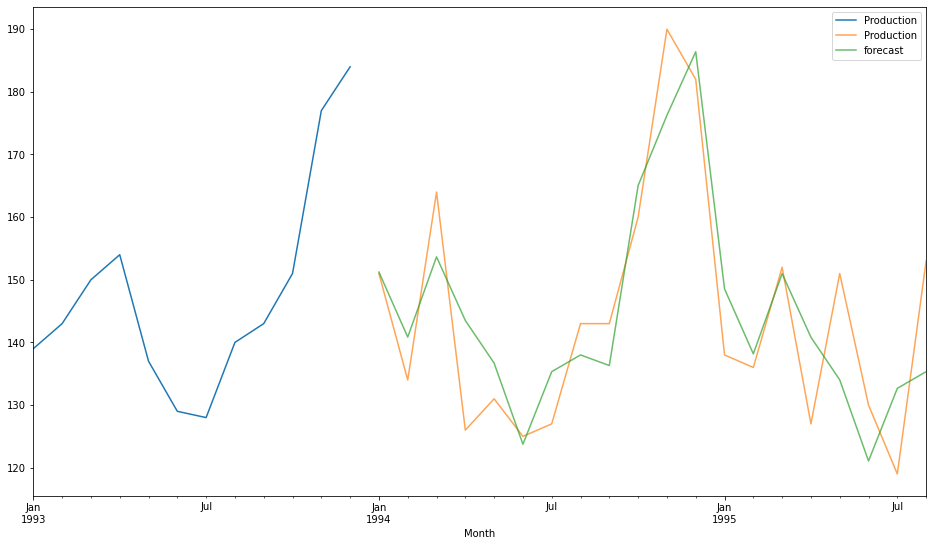

In [216]:
ax=train['1993-01-01':].plot(label='past')
test.plot(ax=ax,label='actual',alpha=0.7,figsize=[16,9])
test_pred.plot(ax=ax,label='forecast',alpha=0.7,figsize=[16,9])

plt.legend()
plt.show()

In [217]:
#calculating mse and rmse

In [218]:
mse=mean_squared_error(test,test_pred)
mse

102.13176409430218

In [219]:
rmse=np.sqrt(mse)
rmse

10.10602612772707